第２章

In [1]:
import numpy as np

In [49]:
class Perceptron(object):
    #パーセプトロンの分類器
    def __init__(self,eta=0.01,n_iter=10):
        self.eta = eta                   #学習率
        self.n_iter = n_iter             #試行回数
        
    def fit(self,X,y):                   #Xはトレーニングデータ、yは目的変数
        #トレーニングデータに適合させる
        self.w_ = np.zeros(1+X.shape[1]) #適合後の重み
        self.errors_ = []                 #各エポックでの誤分類数
        for _ in range(self.n_iter):      #トレーニング回数分データを更新
            errors = 0
            for xi , target in zip(X,y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                #重みの更新が０でないときは誤分類としてカウント
                errors += int(update != 0.0)
            #反復回数ごとの誤差を収納
            self.errors_.append(errors)
        return self

    def net_input(self,X):
        #総入力を計算
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def predict(self,X):
        #1ステップ後のクラスラベルを返す
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/"
"machine-learning-databases/iris/iris.data",header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [39]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

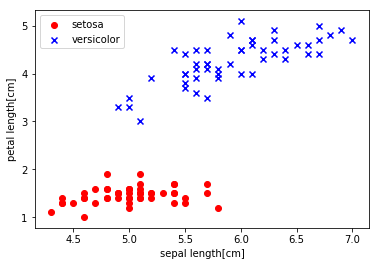

In [55]:
#1~100行目の目的変数の抽出
y = df.iloc[0:100,-1].values
#Iris-setosaを-１に、Iris-versicolorを１に変換
y = np.where(y=="Iris-setosa",-1,1)
#1~100行目の１、３列目の抽出
X = df.iloc[0:100,[0,2]].values
#品種setosaのプロット（赤丸）
plt.scatter(X[:50,0],X[:50,1],color = "red",marker = "o",label = "setosa")
#品種versicolorのプロット（青のバツ）
plt.scatter(X[50:,0],X[50:,1],color = "blue",marker = "x",label = "versicolor")
#軸のラベルの設定
plt.xlabel("sepal length[cm]")
plt.ylabel("petal length[cm]")
#凡例の設置（左上に設置）
plt.legend(loc="upper left")
#図の表示
plt.show


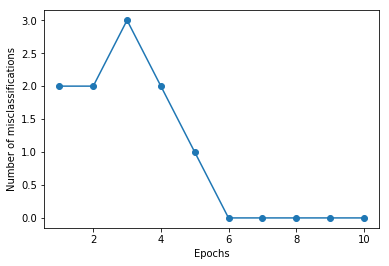

In [50]:
#パーセプロトロンのオブジェクト生成（インスタンス化）
ppn = Perceptron(eta=0.1 , n_iter=10)
#トレーニングモデルへのデータの適合
ppn.fit(X,y)
#エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker="o")
#軸のラベルの設定
plt.xlabel("Epochs")
plt.ylabel("Number of misclassifications")
#図の表示
plt.show()

In [51]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    #マーカーとカラーマップの準備
    markers = ("s","x","o","^","v")
    colors = ("red","blue","lightgreen","gray","cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    #グリッドポイントの作成
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx ,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(*args, **kw)>

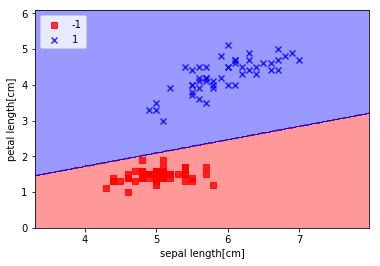

In [54]:
#決定境界のプロット
plot_decision_regions(X,y,classifier=ppn)
#軸のラベルの設定
plt.xlabel("sepal length[cm]")
plt.ylabel("petal length[cm]")
#凡例の設定
plt.legend(loc="upper left")
#図の表示
plt.show

In [66]:
class AdalineGD(object):
    def __init__(self,eta=0.01,n_iter=50):
        self.eta = eta
        self.n_iter=n_iter
    
    def fit(self,X,y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ =[]
        for i in range(self.n_iter):
            #活性化関数の出力値の計算
            output = self.net_input(X)
            #誤差の計算
            errors = y-output
            #w0以外の更新
            self.w_[1:]+=self.eta* X.T.dot(errors)
            #w0の更新
            self.w_[0]+=self.eta*errors.sum()
            #コスト関数の計算
            cost = (errors**2).sum()/2.0
            #コストの格納
            self.cost_.append(cost)
        return self

    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]

    def activation(self,X):
        #線形活性関数の出力を計算
        return self.net_input(X)
    
    def predict(self,X):
        #１ステップ後のクラスラベルを返す
        return np.where(self.activation(X)>=0.0,1,-1)

<function matplotlib.pyplot.show(*args, **kw)>

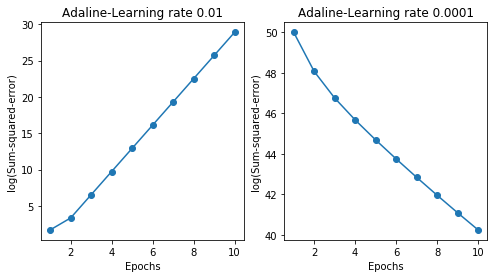

In [69]:
#描画領域を１行２列に分割
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
#勾配降下法によるADALINEの学習
ada1 = AdalineGD(n_iter=10,eta=0.01).fit(X,y)
#エポック数とコストの関係を表す折れ線グラフ（縦軸のコストは常用対数）
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker="o")
#軸のラベルの設定
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
#タイトルの設定
ax[0].set_title("Adaline-Learning rate 0.01")
#勾配降下法によるADALINEの学習
ada2 = AdalineGD(n_iter=10,eta=0.0001).fit(X,y)
#エポック数とコストの関係を表す折れ線グラフ
ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker="o")
#軸のラベルの設定
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(Sum-squared-error)")
#タイトルの設定
ax[1].set_title("Adaline-Learning rate 0.0001")

plt.show

In [70]:
X_std = np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(*args, **kw)>

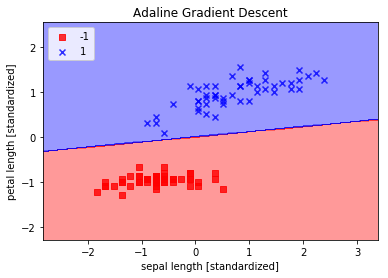

In [72]:
#勾配降下法によるADALINEの学習
ada = AdalineGD(n_iter=15,eta=0.01).fit(X_std,y)
#境界領域のプロット
plot_decision_regions(X_std,y,classifier=ada)
#タイトルの設定
plt.title("Adaline Gradient Descent")
#軸のラベルの設定
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
#凡例の設定
plt.legend(loc="upper left")

plt.show


<function matplotlib.pyplot.show(*args, **kw)>

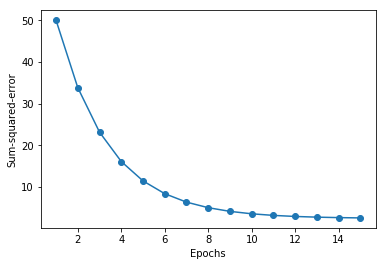

In [73]:
#エポック数とコストの関係を表す折れ線グラフ
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker="o")
#軸のラベルの設定
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")

plt.show

In [75]:
from numpy.random import seed

確率的勾配降下法

In [88]:
class AdalineSGD(object):
    def __init__(self,eta=0.01,n_iter=10,shuffle=True,random_state=None):
        #学習率、トレーニング回数の初期化
        self.eta = eta
        self.n_iter=n_iter
        #重みの初期化フラグはFalseに設定
        self.w_initialized = False
        #各エポックでトレーニングデータをシャッフルするかどうかのフラグを初期化
        self.shuffle = shuffle
        #引数random_stateが指定された場合は乱数種を設定
        if random_state :
            seed(random_state)
            
    def fit(self,X,y):
        #重みベクトルの生成
        self._initialize_weights(X.shape[1])
        #コストを格納する部分のリストの生成
        self.cost_ = []
        #トレーニング回数分トレーニングデータを反復
        for i in range(self.n_iter):
            #指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X,y = self._shuffle(X,y)
            #各サンプルのコストを格納するリストの生成
            cost=[]
            #各サンプルに対する計算f
            for xi, target in zip(X,y):
                #特徴量xiと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi,target))
            #サンプルの平均コストの計算
            avg_cost = sum(cost)/len(y)
            #平均コストを格納
            self.cost_.append(avg_cost)
        return self
        
    def partial_fit(self,X,y):                 #重みを再初期化することなくトレーニングデータに適合させる
        #初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        #目的変数yの要素数が２以上の場合は各サンプルの特徴量xiと目的変数targetで重みを更新
        if y.ravel().shape[0] > 1:
            for xi ,target in zip(X,y):
                self._update_weights(xi,target)
        #目的変数yの要素数が１の場合はサンプル全体の特徴量Xと目的変数yで重みを更新
        else:
            self._update_weights(X,y)
        return self
        
    def _shuffle(self,X,y):                   #トレーニングデータをシャッフル
        r = np.random.permutation(len(y))
        return X[r],y[r]
        
    def _initialize_weights(self,m):          #重みを０に初期化
        self.w_=np.zeros(1+m)
        self.w_initialized = True
            
    def _update_weights(self,xi,target):
        #活性化関数の出力の計算
        output = self.net_input(xi)
        #誤差の計算
        error = (target-output)
        #w１以降の重みの更新
        self.w_[1:] += self.eta*xi.dot(error)
        #w0の更新
        self.w_[0] += self.eta*error
        #コストの計算
        cost = 0.5*error**2
        return cost
        
    def net_input(self,X):                  #総入力を計算
        return np.dot(X,self.w_[1:])+self.w_[0]
        
    def activation(self,X):                 #線形活性化関数の出力を計算
        return self.net_input(X)
        
    def predict(self,X):                    #1ステップ後のクラスのラベルを返す
        return np.where(self.activation(X)>=0.0,1,-1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(*args, **kw)>

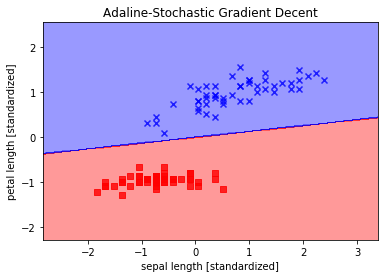

In [89]:
#確率的勾配降下法によるADALINEの学習
ada = AdalineSGD(n_iter=15,eta=0.01,random_state=1)
#モデルへの適合
ada.fit(X_std,y)
#境界領域のプロット
plot_decision_regions(X_std,y,classifier=ada)
#タイトルの設定
plt.title("Adaline-Stochastic Gradient Decent")
#軸のラベルの設定
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

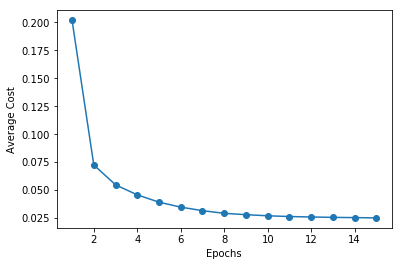

In [90]:
#エポックとコストの折れ線のグラフ
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker="o")
#軸ラベルの設定
plt.xlabel("Epochs")
plt.ylabel("Average Cost")

plt.show